|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:|9|
|Date:|25 September,2025|

## Question 1: First, we will try to load the dataset and do the pre-processing part. From Github i have taken this data set which has information of monthly gold price till a latest date

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, TimeDistributed
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

### Loading the dataset 
df = pd.read_csv("gold_price.csv")
df

,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93
...,...,...
2306,2025-03,2983.25
2307,2025-04,3217.64
2308,2025-05,3309.49
2309,2025-06,3352.66


In [3]:
data = df['Price'].values.reshape(-1,1)
data

array([[  18.93],
       [  18.93],
       [  18.93],
       ...,
       [3309.49],
       [3352.66],
       [3340.15]])

In [4]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

### Preparing the data

In [6]:
train_size = int(len(data_scaled)*0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [7]:
def create_sequences(data,seq_length):
    sequences = []
    for i in range(len(data) - seq_length+1):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

seq_length = 10
train_sequences = create_sequences(train_data,seq_length)
test_sequences = create_sequences(test_data, seq_length)

        

### Splitting the sequences into input and targets

In [12]:
x_train_full, y_train_full = train_sequences[:,:-1], train_sequences[:, -1]
x_test, y_test = test_sequences[:,:-1], test_sequences[:, -1]

val_fraction = 0.2
val_size = int(len(x_train_full)*val_fraction)

x_val = x_train_full[-val_size:]
y_val = y_train_full[-val_size:]

x_train = x_train_full[:-val_size]
y_train = y_train_full[:-val_size]

### Defining and compiling the RNN Model

In [14]:
model = Sequential()
model.add(SimpleRNN(64, activation = 'tanh', input_shape = (seq_length-1,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.summary()

early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights=True, verbose=1)

history = model.fit(x_train,y_train, 
                    epochs = 500,
                    batch_size = 16,
                    validation_data=(x_val,y_val),
                    verbose = 1, 
                    callbacks= [early_stop])


c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.3772e-05 - val_loss: 3.9152e-04
Epoch 2/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6166e-08 - val_loss: 3.6820e-04
Epoch 3/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7216e-08 - val_loss: 3.5442e-04
Epoch 4/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0011e-07 - val_loss: 3.3771e-04
Epoch 5/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0102e-07 - val_loss: 3.1484e-04
Epoch 6/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3213e-08 - val_loss: 2.9836e-04
Epoch 7/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1495e-08 - val_loss: 2.7874e-04
Epoch 8/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0150e-07 - val_loss: 2.7002e-04
Epoch 9/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9958e-08 - val_loss: 2.4461e-04
Epoch 10/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4128e-08 - val_loss: 2.3065e-04
Epoch 11/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2368e-0

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Root Mean Squared error: 63.98662536813604
R2 score: 0.9906292642115201


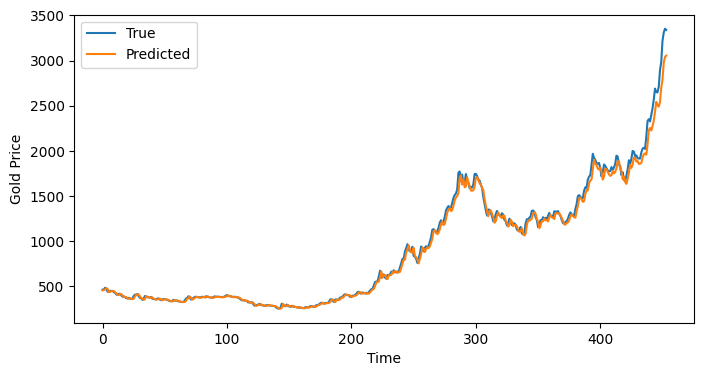

In [15]:
y_pred = model.predict(x_test)
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)
rootmse = np.sqrt(mean_squared_error(y_test_orig,y_pred_orig))
r2 = r2_score(y_test_orig,y_pred_orig)
print("Root Mean Squared error:", rootmse)
print("R2 score:", r2)

##plot
plt.figure(figsize = (8,4))
plt.plot(y_test_orig, label = 'True')
plt.plot(y_pred_orig, label = 'Predicted')
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

## Question 2: Now the previous model we have seen takes an input sequence of length 9 and predicts the next days gold price. if you want to have a model which takes 10 days of data and predict the next ten days of gold price (lets say), then the same model can be modified to get output at every time step by introducing a timedistributed dense layer and also keeping the return sequences parameter = True. But here in order to attempt this problem you need to prepare your input and output sequences accordingly to the model so we can perform these to prepare the sequence initially. First you can import necessary layers, use from keras.layers import SimpleRNN, Dense, TimeDistributed

In [16]:
def create_sequences(data, input_length = 10, output_length = 10 ):
    x,y = [], []
    for i in range(len(data) - input_length - output_length + 1):
        x.append(data[i:i+input_length])
        y.append(data[i+input_length:i+input_length+output_length])
    return np.array(x), np.array(y)

input_length = 10
output_length = 10
x_train_full,y_train_full = create_sequences(train_data, input_length,output_length)
x_test,y_test = create_sequences(test_data, input_length,output_length)

In [17]:
val_fraction = 0.2
val_size = int(len(x_train_full)*val_fraction)

x_val = x_train_full[-val_size:]
y_val = y_train_full[-val_size:]

x_train = x_train_full[:-val_size]
y_train = y_train_full[:-val_size]

In [18]:
model = Sequential()
model.add(SimpleRNN(64,activation = 'tanh', return_sequences=True, input_shape = (seq_length-1,1)))
model.add(TimeDistributed(Dense(1)))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True, verbose=1)
history = model.fit(
x_train, y_train,
epochs = 500,
batch_size = 16,
validation_data = (x_val,y_val),
verbose = 1,
callbacks = [early_stop]
)

c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 9, 64)          │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 9, 1)           │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.2812e-05 - val_loss: 0.0013
Epoch 2/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5257e-07 - val_loss: 9.6952e-04
Epoch 3/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6306e-07 - val_loss: 7.7712e-04
Epoch 4/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5947e-07 - val_loss: 6.6458e-04
Epoch 5/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0991e-07 - val_loss: 5.9694e-04
Epoch 6/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8305e-07 - val_loss: 5.5276e-04
Epoch 7/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2143e-07 - val_loss: 5.2047e-04
Epoch 8/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9736e-07 - val_loss: 4.9274e-04
Epoch 9/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8151e-07 - val_loss: 4.7383e-04
Epoch 10/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7538e-07 - val_loss: 4.5736e-04
Epoch 11/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3656e-07 - 

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
RMSE: 200.3901869726053
R² Score: 0.8977128957634519


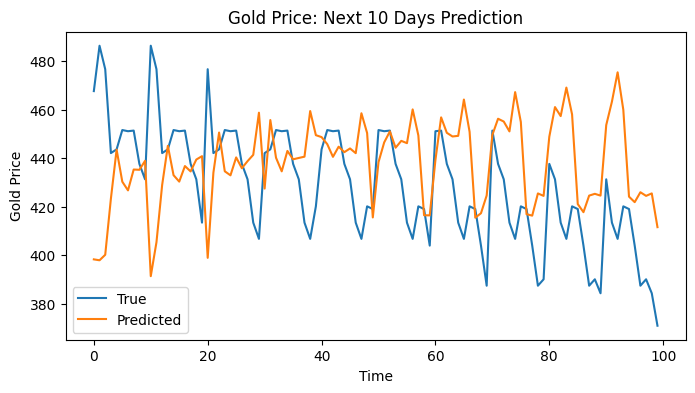

In [19]:
# Prediction
y_pred = model.predict(x_test)
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1))

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
r2 = r2_score(y_test_orig, y_pred_orig)

print("RMSE:", rmse)
print("R² Score:", r2)

# Plot results
plt.figure(figsize=(8,4))
plt.plot(y_test_orig[:100], label='True')
plt.plot(y_pred_orig[:100], label='Predicted')
plt.title("Gold Price: Next 10 Days Prediction")
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

## Question 3. Next if we can check the same problem with a deep RNN. So we will introduce more layers and see how we can proceed. We will try for a many to one RNN model, where we will take 10 days continuous data and predict the next day data using deep RNN model. That is we are going to add few layers in the model.

Now this is an example of an RNN model with enough layers with other dense layers
attached. try to fit this model and see the error and performance

### Preparing the data

In [20]:
def create_sequences(data,seq_length):
    sequences = []
    for i in range(len(data) - seq_length+1):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

seq_length = 10
train_sequences = create_sequences(train_data,seq_length)
test_sequences = create_sequences(test_data, seq_length)


x_train_full, y_train_full = train_sequences[:,:-1], train_sequences[:, -1]
x_test, y_test = test_sequences[:,:-1], test_sequences[:, -1]

val_fraction = 0.2
val_size = int(len(x_train_full)*val_fraction)

x_val = x_train_full[-val_size:]
y_val = y_train_full[-val_size:]

x_train = x_train_full[:-val_size]
y_train = y_train_full[:-val_size]

In [21]:
model = Sequential()
model.add(SimpleRNN(128, activation = 'tanh', return_sequences=True, input_shape = (seq_length-1,1)))
model.add(SimpleRNN(64,activation='tanh', return_sequences=True))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary() 

early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True, verbose=1)
history = model.fit(
x_train, y_train,
epochs = 500,
batch_size = 16,
validation_data = (x_val,y_val),
verbose = 1,
callbacks = [early_stop]
)



c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 9, 128)         │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 9, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,129 (125.50 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0064 - val_loss: 1.4657e-04
Epoch 2/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5777e-07 - val_loss: 2.5384e-04
Epoch 3/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1542e-08 - val_loss: 2.4952e-04
Epoch 4/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3795e-08 - val_loss: 2.4884e-04
Epoch 5/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5798e-08 - val_loss: 2.5312e-04
Epoch 6/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5413e-08 - val_loss: 2.4651e-04
Epoch 7/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8357e-08 - val_loss: 2.5806e-04
Epoch 8/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0504e-08 - val_loss: 2.4808e-04
Epoch 9/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2549e-08 - val_loss: 2.4556e-04
Epoch 10/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8251e-08 - val_loss: 2.2903e-04
Epoch 11/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8488e-08 - 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Root Mean Squared error: 498.8896169875025
R2 score: 0.4303551029635413


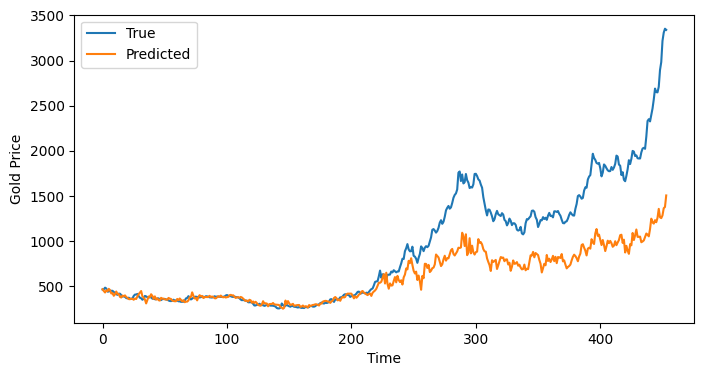

In [22]:
y_pred = model.predict(x_test)
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)
rootmse = np.sqrt(mean_squared_error(y_test_orig,y_pred_orig))
r2 = r2_score(y_test_orig,y_pred_orig)
print("Root Mean Squared error:", rootmse)
print("R2 score:", r2)

##plot
plt.figure(figsize = (8,4))
plt.plot(y_test_orig, label = 'True')
plt.plot(y_pred_orig, label = 'Predicted')
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend()
plt.show()